In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EPL 20/21 DATASETS

In [2]:
epl_data = pd.read_csv('D:\DML\EPL 20-21 Datasets\EPL_20_21.csv')
epl_data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
players_with_most_goals = epl_data.sort_values(by="Goals", ascending=False)
# players_with_most_goals

## Top 10 EPL 20/21 Goals Scorers

In [4]:
top_10_goals_scorers  = players_with_most_goals.iloc[:10]
top_10_goals_scorers = pd.pivot_table(top_10_goals_scorers, values=["Club", "Nationality", "Position","Age", "Goals"], index = "Name", aggfunc=max)
top_10_goals_scorers

,Age,Club,Goals,Nationality,Position
Name,,,,,
Alexandre Lacazette,29,Arsenal,13,FRA,FW
Bruno Fernandes,25,Manchester United,18,POR,MF
Dominic Calvert-Lewin,23,Everton,16,ENG,FW
Harry Kane,27,Tottenham Hotspur,23,ENG,FW
Jamie Vardy,33,Leicester City,15,ENG,FW
Mohamed Salah,28,Liverpool FC,22,EGY,FW
Ollie Watkins,24,Aston Villa,14,ENG,FW
Patrick Bamford,26,Leeds United,17,ENG,FW
Son Heung-min,28,Tottenham Hotspur,17,KOR,FW


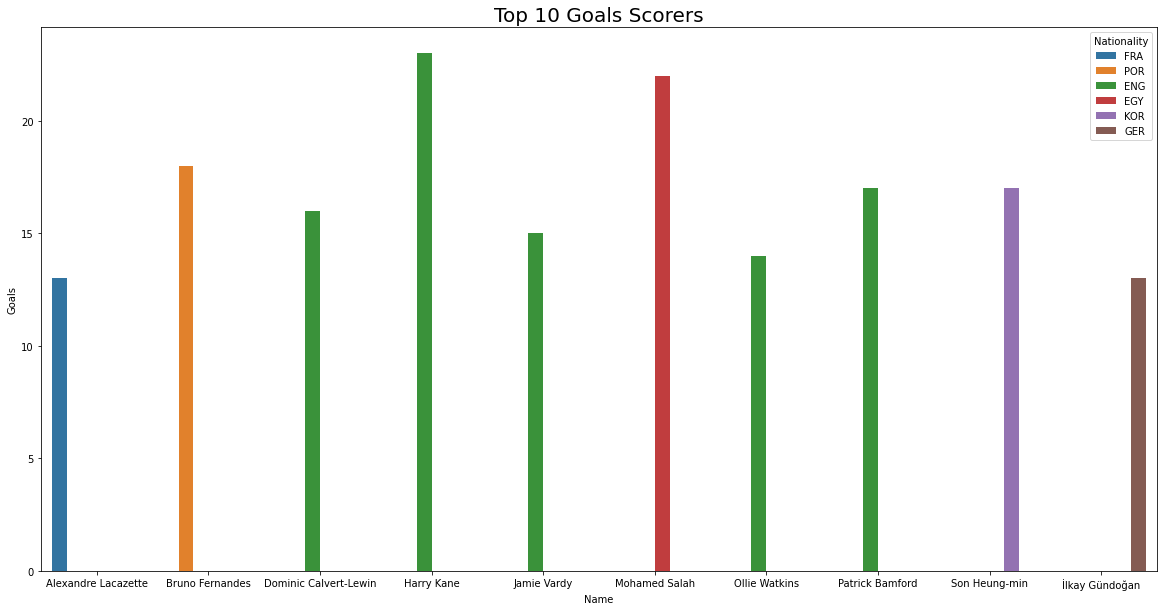

In [5]:
fig = plt.figure(figsize=(20,10))
plt.title("Top 10 Goals Scorers", size=20)
sns.barplot(x = top_10_goals_scorers.index, y = top_10_goals_scorers.Goals, hue= top_10_goals_scorers.Nationality)
plt.show()   

## Top 10 EPL 20/21 Assists

In [6]:
most_assists = epl_data.sort_values(by="Assists", ascending=False)
top_assists = most_assists.iloc[:10]
# top_10_assists

In [7]:
top_10_assists  = top_assists
top_10_assists = pd.pivot_table(top_10_assists, values=["Club", "Nationality", "Position","Age", "Assists"], index = "Name", aggfunc=max)
top_10_assists

,Age,Assists,Club,Nationality,Position
Name,,,,,
Aaron Cresswell,30,8,West Ham United,ENG,DF
Bruno Fernandes,25,12,Manchester United,POR,MF
Harry Kane,27,14,Tottenham Hotspur,ENG,FW
Jack Grealish,24,10,Aston Villa,ENG,"FW,MF"
Jamie Vardy,33,9,Leicester City,ENG,FW
Kevin De Bruyne,29,12,Manchester City,BEL,MF
Marcus Rashford,22,9,Manchester United,ENG,FW
Pascal Groß,29,8,Brighton,GER,"MF,DF"
Raphael Dias Belloli,23,9,Leeds United,BRA,MF


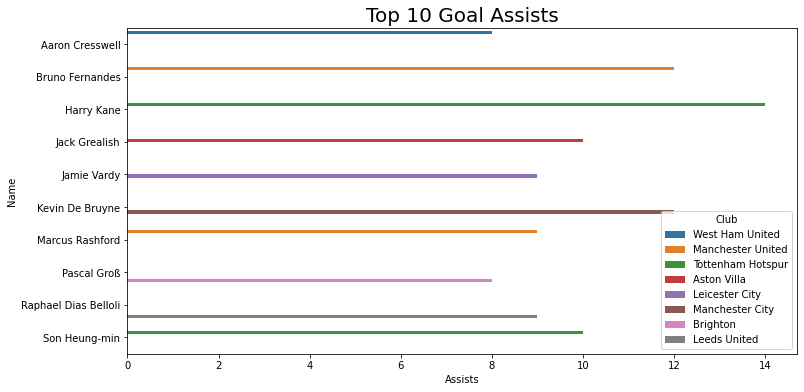

In [8]:
fig = plt.figure(figsize=(12,6))
plt.title("Top 10 Goal Assists", size=20)
sns.barplot(y= top_10_assists.index,x = top_10_assists.Assists, orient='h',hue = top_10_assists.Club)
plt.show() 

# Top 10 Midfielders  with most goals 

In [9]:
mf = epl_data.query('Position == "MF"').sort_values(by="Goals", ascending=False).iloc[:10]
# mf

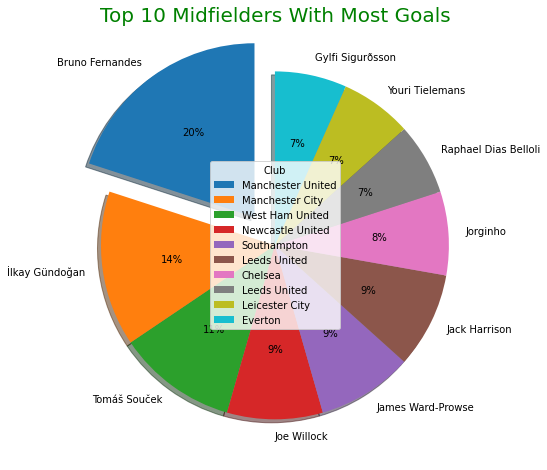

In [10]:
fig = plt.figure(figsize=(18,8))
plt.title("Top 10 Midfielders With Most Goals", size=20, color = "green")
explode = [0.2,0,0,0,0,0,0,0,0,0]
plt.pie(mf.Goals, labels = mf.Name, shadow = True,startangle = 90, explode = explode, autopct='%.0f%%')
plt.legend(mf.Club,title= "Club", loc="center")
plt.show()

# Top 10 Midfielders With Most Assists

In [11]:
mfa = epl_data.query('Position == "MF"').sort_values(by="Assists", ascending=False).iloc[:10]
# mfa

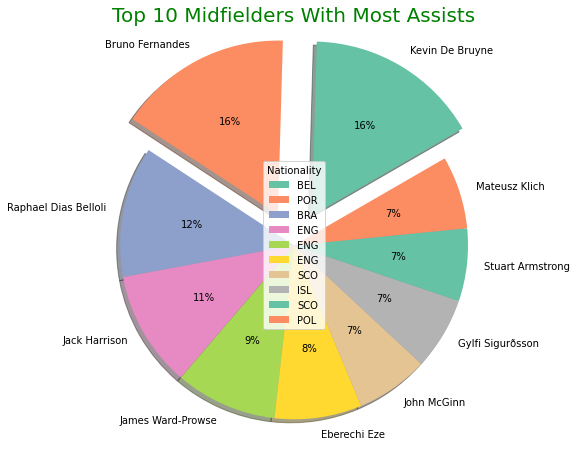

In [12]:
fig = plt.figure(figsize=(18,8))
plt.title("Top 10 Midfielders With Most Assists", size=20,color = "green")
explode = [0.2,0.2,0,0,0,0,0,0,0,0]
plt.pie(mfa.Assists, labels = mfa.Name, shadow = True, startangle = 30, explode = explode, autopct='%.0f%%', colors = sns.color_palette('Set2'))
plt.legend(mfa.Nationality, title = "Nationality", loc="center")
plt.show()

# Defenders With Most Bookings

In [13]:
# Total Yellow and Red Cards
most_yellow_cards = epl_data.query('Position == "DF"').sort_values(by = "Yellow_Cards", ascending= False).iloc[:10]
player_yellow_card = pd.pivot_table(most_yellow_cards, values = ['Club','Nationality','Position','Age','Matches','Yellow_Cards'], index = "Name", aggfunc = max)
player_yellow_card


,Age,Club,Matches,Nationality,Position,Yellow_Cards
Name,,,,,,
Ezgjan Alioski,28,Leeds United,36,MKD,DF,7
Harry Maguire,27,Manchester United,34,ENG,DF,11
Héctor Bellerín,25,Arsenal,25,ESP,DF,8
Joachim Andersen,24,Fulham,31,DEN,DF,7
Jonny Evans,32,Leicester City,28,NIR,DF,7
Luke Ayling,28,Leeds United,38,ENG,DF,7
Luke Shaw,25,Manchester United,32,ENG,DF,8
Mason Holgate,23,Everton,28,ENG,DF,9
Matty Cash,22,Aston Villa,28,ENG,DF,8


## Yellow Cards

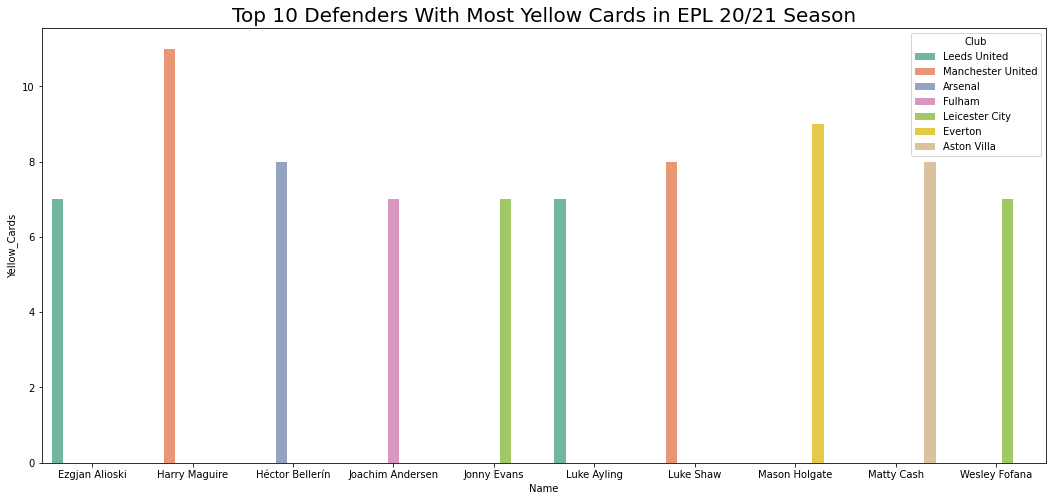

In [14]:
fig = plt.figure(figsize=(18,8))
plt.title("Top 10 Defenders With Most Yellow Cards in EPL 20/21 Season",size=20)
sns.barplot(x = player_yellow_card.index, y = player_yellow_card.Yellow_Cards, hue = player_yellow_card.Club, palette = "Set2")
plt.show()

## Red Cards

In [15]:
most_red_cards = epl_data.query('Position == "DF"').sort_values(by = "Red_Cards", ascending= False).iloc[:10]
player_red_card = pd.pivot_table(most_red_cards, values = ['Club','Nationality','Position','Age','Matches','Red_Cards'], index = "Name", aggfunc = max)
player_red_card

,Age,Club,Matches,Nationality,Position,Red_Cards
Name,,,,,,
Craig Dawson,30,West Ham United,22,ENG,DF,1
David Luiz,33,Arsenal,20,BRA,DF,1
Fabian Schär,28,Newcastle United,18,SUI,DF,1
Gabriel Dos Santos,22,Arsenal,23,BRA,DF,1
Jan Bednarek,24,Southampton,36,POL,DF,1
Jannik Vestergaard,27,Southampton,30,DEN,DF,1
Joachim Andersen,24,Fulham,31,DEN,DF,1
Lewis Dunk,28,Brighton,33,ENG,DF,2
Matt Doherty,28,Tottenham Hotspur,17,IRL,DF,1


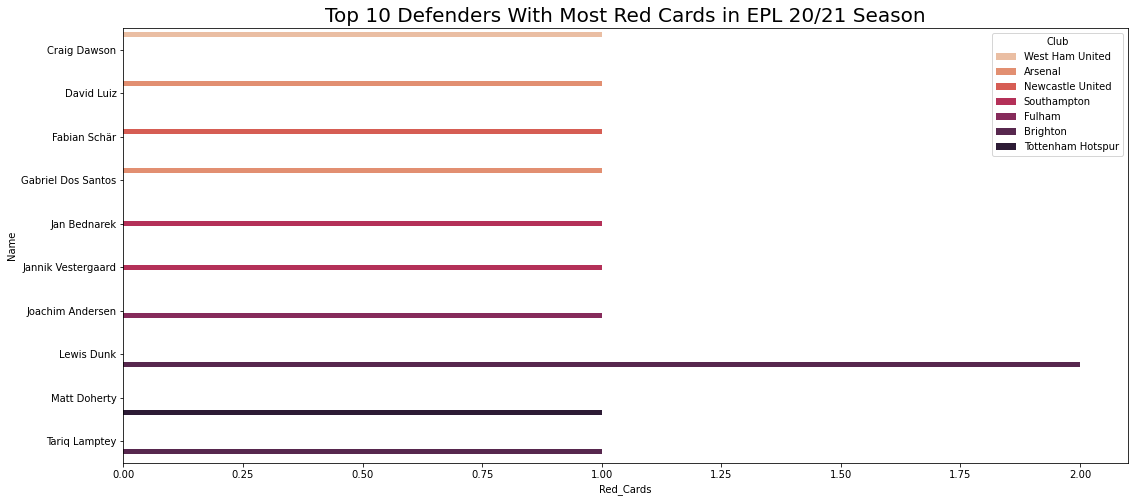

In [16]:
fig = plt.figure(figsize=(18,8))
plt.title("Top 10 Defenders With Most Red Cards in EPL 20/21 Season",size=20)
sns.barplot(y = player_red_card.index, x = player_red_card.Red_Cards, hue = player_red_card.Club, orient='h',palette = "rocket_r")
plt.show()

In [17]:
## Country players with most goals
england = epl_data.query('Nationality == "ENG"')
england = england.Goals.sum()
print("Total goals by players from England is ", england," goals")

Total goals by players from England is  364  goals


## Top 10 Countries With Most Players

In [18]:
top_10_countries = epl_data.groupby(by = "Nationality").count()['Name']
top_10_countries = top_10_countries.sort_values(ascending = False).iloc[:10]
top_10_countries

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
Name: Name, dtype: int64

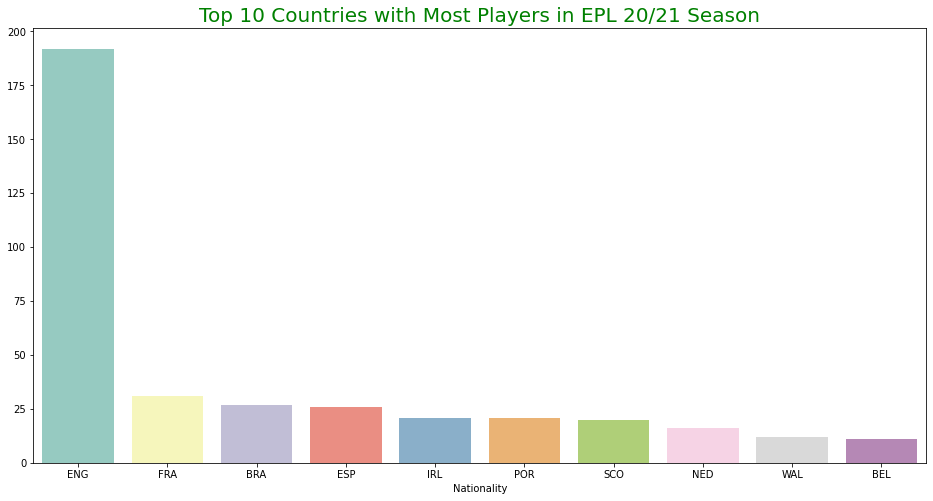

In [19]:
fig = plt.figure(figsize = (16,8))
plt.title("Top 10 Countries with Most Players in EPL 20/21 Season", size = 20, color = "green")
sns.barplot(x = top_10_countries.index, y = top_10_countries.values, orient = 'v', palette = "Set3")
plt.show()

## Players by country

In [20]:
players_by_country = epl_data.groupby('Nationality')
for playerName,countrygroup in players_by_country:
    print(playerName)
    print(countrygroup)

ALG
              Name             Club Nationality Position  Age  Matches  \
35    Riyad Mahrez  Manchester City         ALG       FW   29       27   
131  Islam Slimani   Leicester City         ALG       FW   32        1   
147  Saïd Benrahma  West Ham United         ALG    FW,MF   24       30   

     Starts  Mins  Goals  Assists  Passes_Attempted  Perc_Passes_Completed  \
35       23  1949      9        6              1086                   84.2   
131       0    20      0        0                11                   72.7   
147      14  1391      1        6               527                   78.0   

     Penalty_Goals  Penalty_Attempted    xG    xA  Yellow_Cards  Red_Cards  
35               0                  0  0.26  0.27             0          0  
131              0                  0  0.19  0.13             0          0  
147              0                  0  0.15  0.28             0          0  
ARG
                    Name               Club Nationality Position  Age  \
2

In [21]:
algeria = players_by_country.get_group('ALG')
algeria

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
35,Riyad Mahrez,Manchester City,ALG,FW,29,27,23,1949,9,6,1086,84.2,0,0,0.26,0.27,0,0
131,Islam Slimani,Leicester City,ALG,FW,32,1,0,20,0,0,11,72.7,0,0,0.19,0.13,0,0
147,Saïd Benrahma,West Ham United,ALG,"FW,MF",24,30,14,1391,1,6,527,78.0,0,0,0.15,0.28,0,0


# Club Analysis 

In [22]:
# team grouping
team_grouped = epl_data.groupby('Club')
for name,group in team_grouped:
    print (name)
    print (group)

Arsenal
                          Name     Club Nationality Position  Age  Matches  \
183                 Bernd Leno  Arsenal         GER       GK   28       35   
184                Bukayo Saka  Arsenal         ENG    FW,DF   18       32   
185               Granit Xhaka  Arsenal         SUI    MF,DF   27       31   
186                Rob Holding  Arsenal         ENG       DF   24       30   
187  Pierre-Emerick Aubameyang  Arsenal         GAB       FW   31       29   
188             Kieran Tierney  Arsenal         SCO       DF   23       27   
189            Héctor Bellerín  Arsenal         ESP       DF   25       25   
190         Gabriel Dos Santos  Arsenal         BRA       DF   22       23   
191        Alexandre Lacazette  Arsenal         FRA       FW   29       31   
192              Thomas Partey  Arsenal         GHA       MF   27       24   
193           Emile Smith-Rowe  Arsenal         ENG    MF,FW   20       20   
194              Dani Ceballos  Arsenal         ESP     

# Arsenal

In [23]:
arsenal = team_grouped.get_group('Arsenal')
arsenal.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
183,Bernd Leno,Arsenal,GER,GK,28,35,35,3131,0,0,1156,79.8,0,0,0.00,0.00,0,1
184,Bukayo Saka,Arsenal,ENG,"FW,DF",18,32,30,2553,5,3,1155,74.9,0,0,0.24,0.17,1,0
185,Granit Xhaka,Arsenal,SUI,"MF,DF",27,31,29,2522,1,2,2164,89.9,0,0,0.03,0.06,7,1
186,Rob Holding,Arsenal,ENG,DF,24,30,28,2558,0,1,1768,89.3,0,0,0.04,0.01,2,0
187,Pierre-Emerick Aubameyang,Arsenal,GAB,FW,31,29,26,2332,10,3,691,75.0,2,2,0.41,0.11,2,0


In [24]:
arsenal_top_scorers = arsenal.sort_values(by = "Goals", ascending = False).iloc[:10]
arsenal_top_scorers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
191,Alexandre Lacazette,Arsenal,FRA,FW,29,31,22,1923,13,2,524,78.2,3,3,0.46,0.13,3,0
197,Nicolas Pépé,Arsenal,CIV,FW,25,29,16,1616,10,1,674,75.7,1,1,0.39,0.05,1,1
187,Pierre-Emerick Aubameyang,Arsenal,GAB,FW,31,29,26,2332,10,3,691,75.0,2,2,0.41,0.11,2,0
184,Bukayo Saka,Arsenal,ENG,"FW,DF",18,32,30,2553,5,3,1155,74.9,0,0,0.24,0.17,1,0
190,Gabriel Dos Santos,Arsenal,BRA,DF,22,23,22,1996,2,0,1492,86.0,0,0,0.05,0.00,4,1
205,Eddie Nketiah,Arsenal,ENG,FW,21,17,4,423,2,1,89,82.0,0,0,0.52,0.18,0,0
193,Emile Smith-Rowe,Arsenal,ENG,"MF,FW",20,20,18,1440,2,4,724,87.7,0,0,0.13,0.18,0,0
203,Martinelli,Arsenal,BRA,FW,19,14,7,589,2,1,159,79.2,0,0,0.53,0.32,0,0
189,Héctor Bellerín,Arsenal,ESP,DF,25,25,24,2089,1,2,1302,82.9,0,0,0.04,0.10,8,0
188,Kieran Tierney,Arsenal,SCO,DF,23,27,26,2299,1,3,1490,76.2,0,0,0.02,0.16,4,0


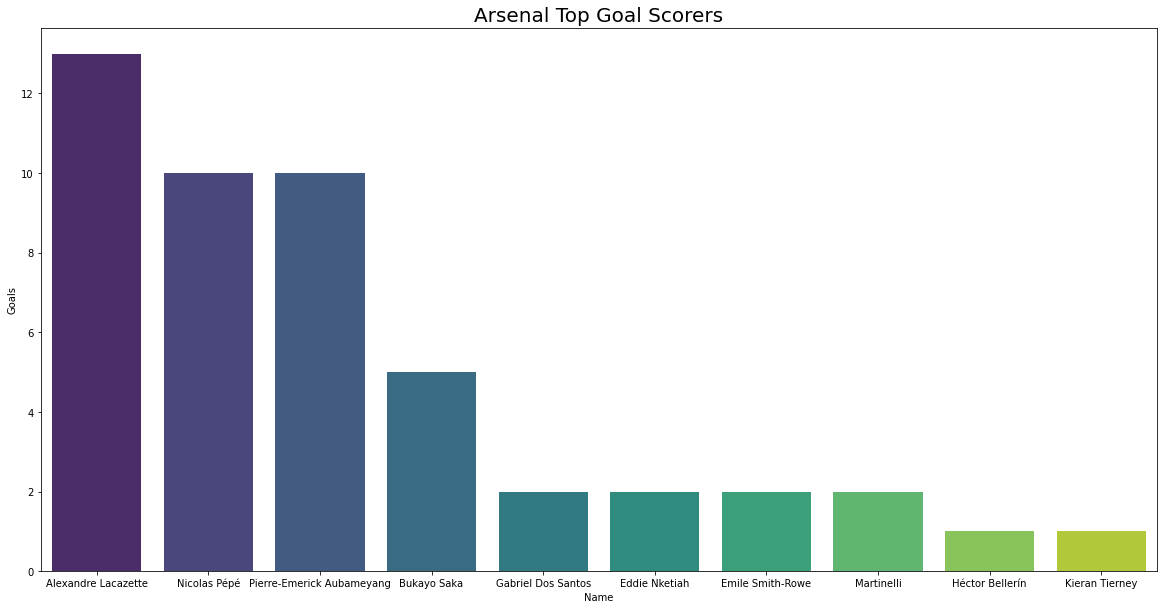

In [25]:
fig = plt.figure(figsize = (20,10))
plt.title("Arsenal Top Goal Scorers", size=20)
sns.barplot(x= arsenal_top_scorers.Name, y = arsenal_top_scorers.Goals, palette = "viridis" )
plt.show()

In [26]:
# Arsenal Total Goals in 20/21 Season
arsenal_total_goals =  arsenal['Goals'].sum()
print("Arsenal total goals of the  players in 20/21 season : ",arsenal_total_goals)

Arsenal total goals of the  players in 20/21 season :  53


In [27]:
# Arsenal Total Assists in 20/21 Season
arsenal_total_assists =  arsenal['Assists'].sum()
print("Arsenal total assists of the  players in 20/21 season : ",arsenal_total_assists)

Arsenal total assists of the  players in 20/21 season :  38


In [28]:
# Arsenal Total Matches in 20/21 Season
arsenal_total_matches =  arsenal['Matches'].sum()
print("Arsenal total matches of the players in 20/21 season : ",arsenal_total_matches)

Arsenal total matches of the players in 20/21 season :  532


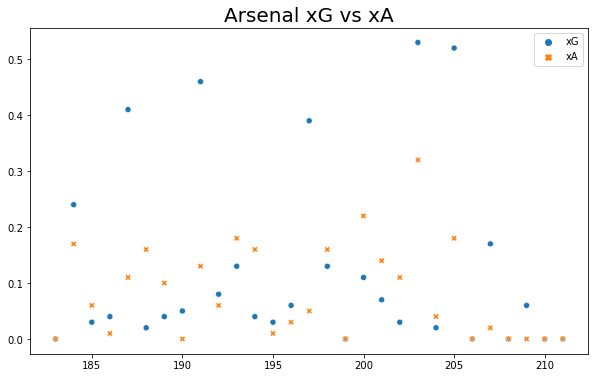

In [29]:
# Arsenal xG vs xA
xG_vs_xA = arsenal[['xG','xA']]
fig = plt.figure(figsize=(10,6))
plt.title("Arsenal xG vs xA", size=20)
sns.scatterplot(data = xG_vs_xA,sizes=(20, 200))
plt.show()

In [30]:
# Arsenal Total Penalty Scored
total_penalty = arsenal['Penalty_Goals'].sum()
print("Arsenal total penalty goals : ", total_penalty)

Arsenal total penalty goals :  6


## Arsenal top forwards

In [31]:
# Arsenal top forwards
arsenal_top_forward = arsenal.query('Position == "FW"').sort_values(by = "Goals", ascending = False).iloc[:5]
arsenal_top_forward = pd.pivot_table(top_forward, values = ["Matches","Goals","Assists","Nationality"], index = "Name", aggfunc = max)
arsenal_top_forward

NameError: name 'top_forward' is not defined

NameError: name 'top_forward' is not defined

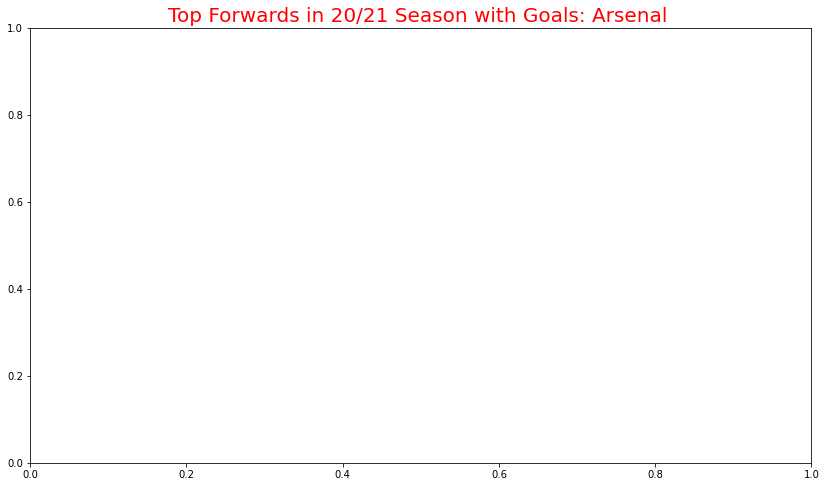

In [32]:
fig = plt.figure(figsize=(14,8))
plt.title("Top Forwards in 20/21 Season with Goals: Arsenal ",size = 20, color = 'red')
plt.pie(top_forward.Goals, labels = top_forward.index,autopct='%.0f%%', colors = sns.color_palette("Spectral_r"), shadow = True, startangle = 45)
plt.legend(title = 'Player Name',loc = "upper right")
plt.show()

## Arsenal top Midfielders

In [33]:
top_midfielders = arsenal.query('Position == "MF"').sort_values(by = ['Assists','Goals'], ascending = False).iloc[:3]
top_midfielders = top_midfielders[['Name', 'Matches','Assists','Goals']]
top_midfielders

,Name,Matches,Assists,Goals
194,Dani Ceballos,25,3,0
200,Martin Ødegaard,14,2,1
192,Thomas Partey,24,2,0


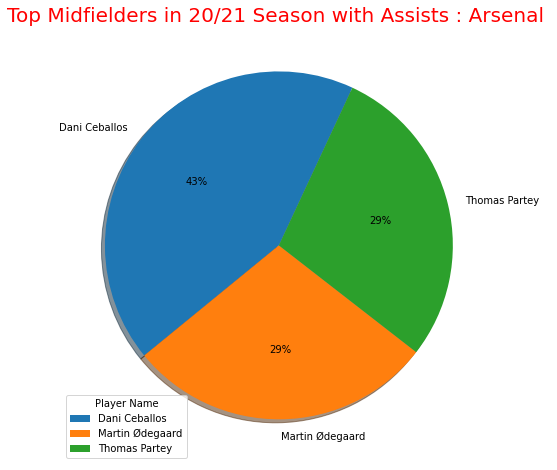

In [34]:
fig = plt.figure(figsize=(14,8))
plt.title("Top Midfielders in 20/21 Season with Assists : Arsenal ",size = 20, color = 'red')
plt.pie(top_midfielders.Assists, labels = top_midfielders.Name,autopct='%.0f%%', shadow = True, startangle = 65)
plt.legend(title = 'Player Name',loc = "lower left")
plt.show()

## Chelsea

In [35]:
chelsea = team_grouped.get_group('Chelsea')
chelsea.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [36]:
top_scorers = chelsea.sort_values(by = "Goals", ascending = False)
top_scorers = top_scorers[["Name","Position","Matches","Goals"]]
top_scorers
top_10 = top_scorers.iloc[:10]
top_10

,Name,Position,Matches,Goals
7,Jorginho,MF,28,7
0,Mason Mount,"MF,FW",36,6
2,Timo Werner,FW,35,6
16,Tammy Abraham,FW,22,6
9,Kurt Zouma,DF,24,5
19,Olivier Giroud,FW,17,4
12,Christian Pulisic,"FW,MF",27,4
13,Kai Havertz,"MF,FW",27,4
3,Ben Chilwell,DF,27,3
8,Thiago Silva,DF,23,2


<AxesSubplot:title={'center':'Chelsea Top 10 Scorers in EPL 20/21 '}, xlabel='Name', ylabel='Goals'>

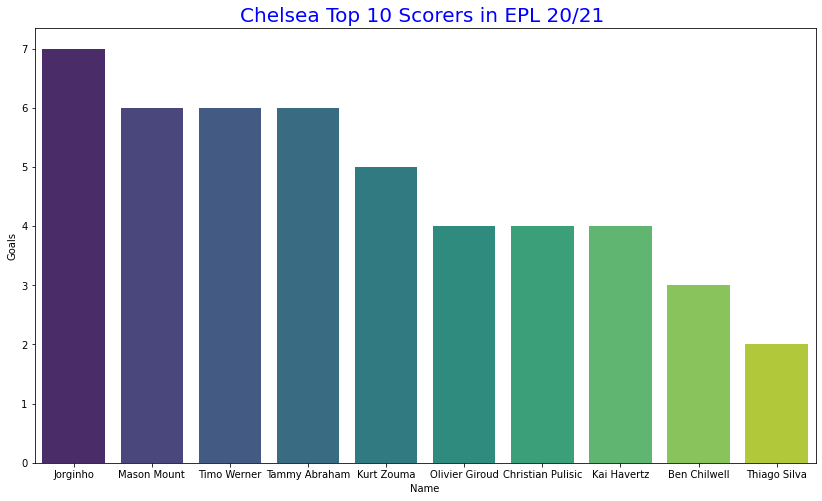

In [37]:
fig = plt.figure(figsize=(14,8))
plt.title("Chelsea Top 10 Scorers in EPL 20/21 ", size = 20, color = "blue")
sns.barplot(x = top_10.Name, y = top_10.Goals, palette = "viridis")


In [38]:
## Chelsea total goals
chelsea_total_goals = chelsea['Goals'].sum()
print("chelsea total goals of the players in 20/21 season: ", chelsea_total_goals)

chelsea total goals of the players in 20/21 season:  56


In [39]:
## Chelsea total matches
chelsea_total_matches = chelsea['Matches'].sum()
print("Chelsea total matches of the players in 20/21 season : ", chelsea_total_matches)

Chelsea total matches of the players in 20/21 season :  526


In [40]:
# Arsenal Total Goals in 20/21 Season
chelsea_total_assists =  chelsea['Assists'].sum()
print("Chelsea total assists of the  players in 20/21 season : ",chelsea_total_assists)

Chelsea total assists of the  players in 20/21 season :  38


## Rating Arsenal and Chelsea by matches,goals and assists

In [41]:
chelsea_data = {'Matches':chelsea_total_matches, 'Assists':chelsea_total_assists, 'Goals':chelsea_total_goals}
chelsea_rating = pd.DataFrame(data = chelsea_data, index = [1])
chelsea_rating

,Matches,Assists,Goals
1,526,38,56


In [42]:
arsenal_data = {'Matches':arsenal_total_matches, 'Assists':arsenal_total_assists, 'Goals':arsenal_total_goals}
arsenal_rating = pd.DataFrame(data = arsenal_data, index = [2])
arsenal_rating

,Matches,Assists,Goals
2,532,38,53
